<a href="https://colab.research.google.com/github/Rajat-Salunke/Facial-Emotion-Detection/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O train.zip "https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=1"
!unzip -q train.zip
!pip install -q tensorflow


--2025-05-27 05:49:46--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa854e1ce8f0d5183738f35ce8.dl.dropboxusercontent.com/cd/0/inline/CqcsIopZbrWG3WNPX9hygzM7UN5BlI8hfwsz19TNO7hvFzn7xgUGlTIzJDUx0qCVje_ofxe15EetUw-obJWJ_oJM3y_uN3c8SvRNY4Tx-lQr7X446d9K6OA54YBSlsUJ1HN5MsFjpp5dOZ6hMadcpY38/file?dl=1# [following]
--2025-05-27 05:49:46--  https://ucaa854e1ce8f0d5183738f35ce8.dl.dropboxusercontent.com/cd/0/inline/CqcsIopZbrWG3WNPX9hygzM7UN5BlI8hfwsz19TNO7hvFzn7xgUGlTIzJDUx0qCVje_ofxe15EetUw-obJWJ_oJM3y_uN3c8SvRNY4Tx-lQr7X446d9K6OA54YBSlsUJ1HN5MsFjpp5dOZ6hMadcpY38/file?dl=1
Resolving ucaa854e1ce8f0d5183738f35ce8.dl.dropboxusercontent.com (ucaa854e1ce8f0d5183738f35ce8.dl.dropboxusercontent.com)... 162.1

In [ ]:
!pip install -q tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy


# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices


Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


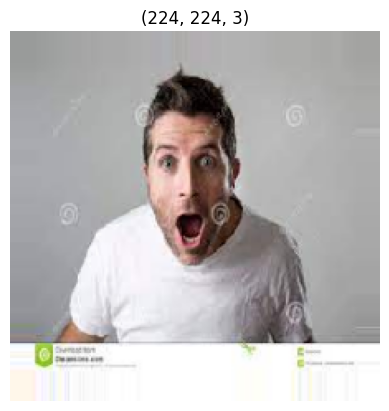

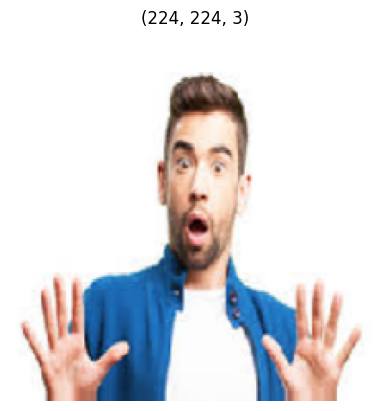

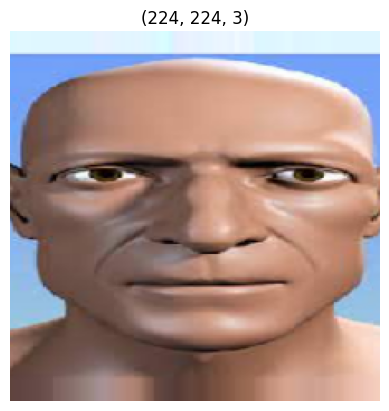

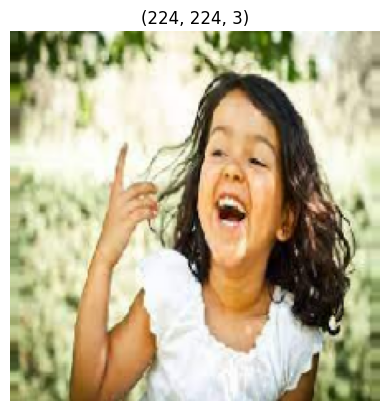

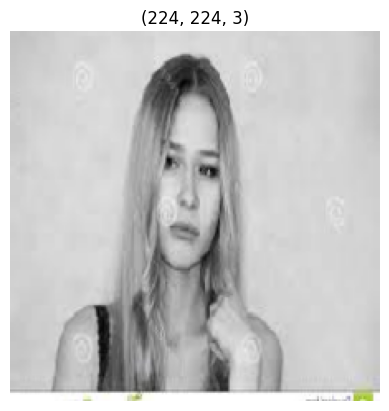

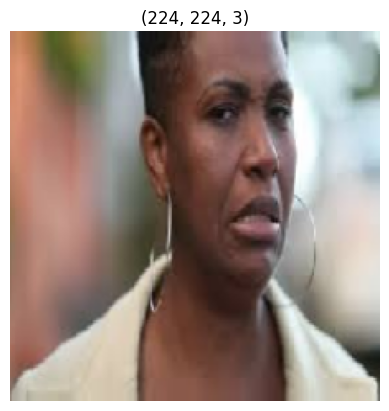

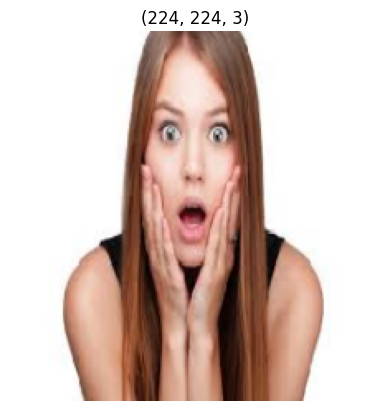

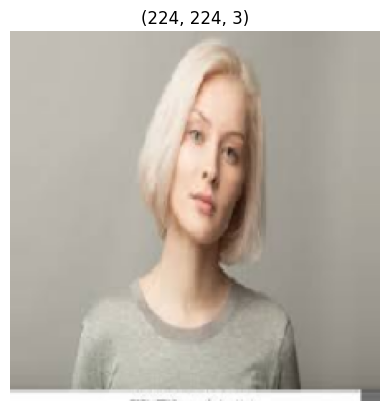

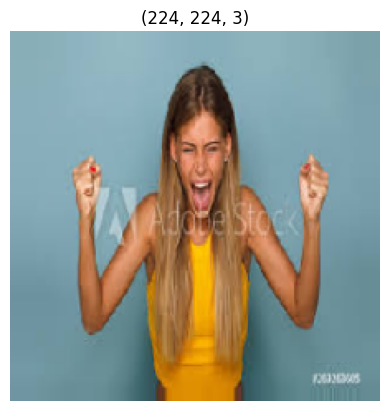

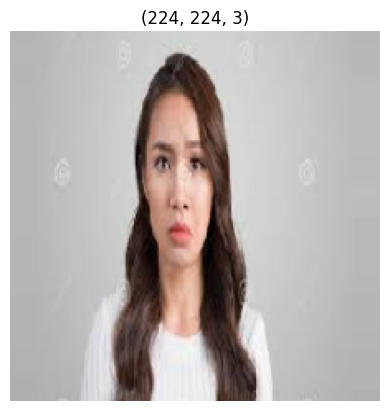

In [ ]:
# Get a batch of images and labels
t_img, label = next(train_data)


#-----------------------------------------------------------------------------
# Function to plot the images
def plotImages(img_arr, label):
    """
    input  :- images array
    output :- plots the images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow((im * 255).astype(np.uint8))  # Convert to uint8 for proper display
        plt.title(im.shape)
        plt.axis('off')
        plt.show()

        count += 1
        if count == 10:
            break

#-----------------------------------------------------------------------------
# Function call to plot the images
plotImages(t_img, label)


In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]




In [ ]:
hist = model.fit(train_data,
                 steps_per_epoch=10,
                 epochs=30,
                 validation_data=val_data,
                 validation_steps=8,
                 callbacks=[es, mc])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1691 - loss: 11.2844
Epoch 1: val_accuracy improved from -inf to 0.37109, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.1708 - loss: 11.4693 - val_accuracy: 0.3711 - val_loss: 7.5248
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2812 - loss: 9.0716

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.37109 to 0.38281, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2812 - loss: 9.0716 - val_accuracy: 0.3828 - val_loss: 6.5974
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4542 - loss: 6.0880
Epoch 3: val_accuracy improved from 0.38281 to 0.61719, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.4569 - loss: 6.0780 - val_accuracy: 0.6172 - val_loss: 2.8568
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6562 - loss: 3.2755
Epoch 4: val_accuracy improved from 0.61719 to 0.68359, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6562 - loss: 3.2755 - val_accuracy: 0.6836 - val_loss: 2.4455
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6799 - loss: 2.7914
Epoch 5: val_accuracy improved from 0.68359 to 0.84375, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6827 - loss: 2.7465 - val_accuracy: 0.8438 - val_loss: 1.2933
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7188 - loss: 2.0286
Epoch 6: val_accuracy did not improve from 0.84375
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7188 - loss: 2.0286 - val_accuracy: 0.8242 - val_loss: 1.2593
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7858 - loss: 1.7215
Epoch 7: val_accuracy improved from 0.84375 to 0.87109, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7872 - loss: 1.6776 - val_accuracy: 0.8711 - val_loss: 0.6268
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7500 - loss: 1.3888
Epoch 8: val_accuracy improved from 0.87109 to 0.87500, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7500 - loss: 1.3888 - val_accuracy: 0.8750 - val_loss: 0.6280
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9127 - loss: 0.4797
Epoch 9: val_accuracy improved from 0.87500 to 0.95703, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9120 - loss: 0.4796 - val_accuracy: 0.9570 - val_loss: 0.2813
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8125 - loss: 0.9037
Epoch 10: val_accuracy did not improve from 0.95703
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8125 - loss: 0.9037 - val_accuracy: 0.9414 - val_loss: 0.2469
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9058 - loss: 0.4351
Epoch 11: val_accuracy improved from 0.95703 to 0.97656, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9072 - loss: 0.4278 - val_accuracy: 0.9766 - val_loss: 0.1036
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9375 - loss: 0.1890
Epoch 12: val_accuracy did not improve from 0.97656
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9375 - loss: 0.1890 - val_accuracy: 0.9688 - val_loss: 0.1348
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9488 - loss: 0.2035
Epoch 13: val_accuracy did not improve from 0.97656
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.9488 - loss: 0.2008 - val_accuracy: 0.9766 - val_loss: 0.0531
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9688 - loss: 0.1480
Epoch 14: val_accuracy improved from 0.97656 to 0.99219, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9688 - loss: 0.1480 - val_accuracy: 0.9922 - val_loss: 0.0241
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9733 - loss: 0.1107
Epoch 15: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9734 - loss: 0.1108 - val_accuracy: 0.9883 - val_loss: 0.0334
Epoch 16/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9333 - loss: 0.1018
Epoch 16: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9333 - loss: 0.1018 - val_accuracy: 0.9922 - val_loss: 0.0370
Epoch 17/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9852 - loss: 0.0327
Epoch 17: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.9851 - loss: 0.0347 - val_accuracy: 0.9922 - val_loss: 0.0424
Epoch 18/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9688 - loss: 0.0570
Epoch 18: val_accuracy improved from 0.99219 t

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9688 - loss: 0.0570 - val_accuracy: 0.9961 - val_loss: 0.0289
Epoch 19/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9997 - loss: 0.0148
Epoch 19: val_accuracy did not improve from 0.99609
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.9994 - loss: 0.0156 - val_accuracy: 0.9922 - val_loss: 0.0199
Epoch 19: early stopping


In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:

h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

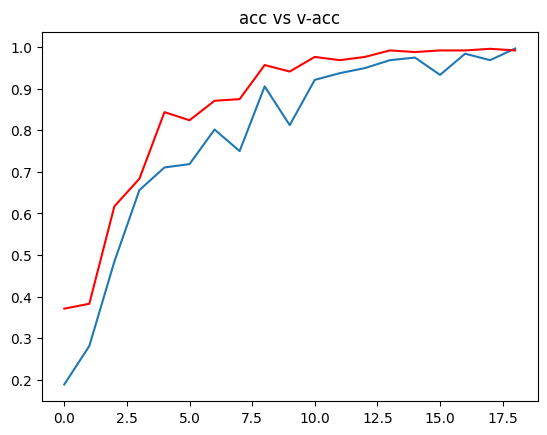

In [ ]:

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

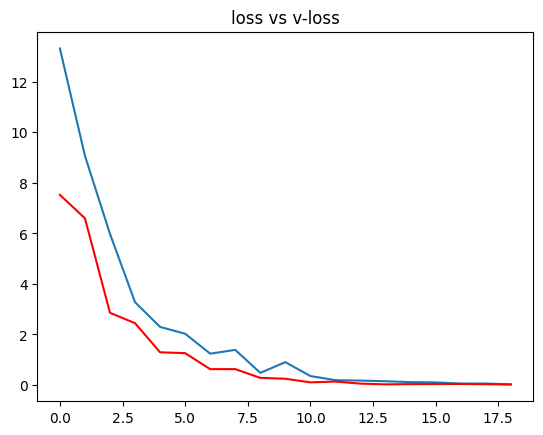

In [ ]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()


In [ ]:

# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
 the image is of Happy


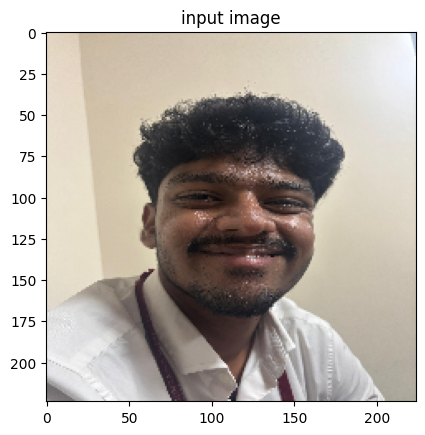

In [ ]:

# path for the image to see if it predics correct class

path = "/content/WhatsApp Image 2025-05-27 at 11.38.19.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()